In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
path='/gdrive/My Drive/ML:Pilot/Participants/Adithya/corona_xray/dataset/'

In [0]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import numpy as np
import cv2
import os
imagePaths = list(paths.list_images(path))
data = []
labels = []

In [4]:
print(imagePaths)

['/gdrive/My Drive/ML:Pilot/Participants/Adithya/corona_xray/dataset/normal/NORMAL2-IM-0315-0001.jpeg', '/gdrive/My Drive/ML:Pilot/Participants/Adithya/corona_xray/dataset/normal/person1935_bacteria_4849.jpeg', '/gdrive/My Drive/ML:Pilot/Participants/Adithya/corona_xray/dataset/normal/person525_bacteria_2216.jpeg', '/gdrive/My Drive/ML:Pilot/Participants/Adithya/corona_xray/dataset/normal/NORMAL2-IM-1179-0001.jpeg', '/gdrive/My Drive/ML:Pilot/Participants/Adithya/corona_xray/dataset/normal/person438_bacteria_1893.jpeg', '/gdrive/My Drive/ML:Pilot/Participants/Adithya/corona_xray/dataset/normal/person651_bacteria_2543.jpeg', '/gdrive/My Drive/ML:Pilot/Participants/Adithya/corona_xray/dataset/normal/person259_bacteria_1220.jpeg', '/gdrive/My Drive/ML:Pilot/Participants/Adithya/corona_xray/dataset/normal/person1558_bacteria_4066.jpeg', '/gdrive/My Drive/ML:Pilot/Participants/Adithya/corona_xray/dataset/normal/person339_bacteria_1574.jpeg', '/gdrive/My Drive/ML:Pilot/Participants/Adithya/c

In [0]:

for imagePath in imagePaths:
	label = imagePath.split(os.path.sep)[-2]
	image = cv2.imread(imagePath)
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	image = cv2.resize(image, (224, 224))
	image=image.reshape(-1)
	data.append(image)
	labels.append(label)
labels = np.array(labels)
data=np.array(data)



In [0]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
labels=label.fit_transform(labels)

In [7]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.25, random_state=1)

In [0]:
a=X_train
b=y_train
a = np.array(a)
b = np.ravel(b)

In [10]:
data.shape

(50, 150528)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
import time
error=[]
for i in range(1,20):
  t1=time.time()
  knn=KNeighborsClassifier(algorithm='brute',n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i=knn.predict(X_test)
  t2=time.time()
  print(str(i)+": "+str(t2-t1))
  
  error.append(np.mean(pred_i!=y_test))
error

1: 0.04934811592102051
2: 0.04041552543640137
3: 0.04006838798522949
4: 0.03969287872314453
5: 0.03933072090148926
6: 0.040735721588134766
7: 0.04089999198913574
8: 0.039182424545288086
9: 0.04043698310852051
10: 0.03931069374084473
11: 0.040648460388183594
12: 0.041635751724243164
13: 0.039795637130737305
14: 0.03935718536376953
15: 0.04055523872375488
16: 0.04369091987609863
17: 0.0390627384185791
18: 0.03924393653869629
19: 0.03928565979003906


[0.07692307692307693,
 0.0,
 0.07692307692307693,
 0.07692307692307693,
 0.07692307692307693,
 0.07692307692307693,
 0.07692307692307693,
 0.07692307692307693,
 0.23076923076923078,
 0.23076923076923078,
 0.23076923076923078,
 0.15384615384615385,
 0.15384615384615385,
 0.15384615384615385,
 0.23076923076923078,
 0.15384615384615385,
 0.23076923076923078,
 0.15384615384615385,
 0.15384615384615385]

2


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

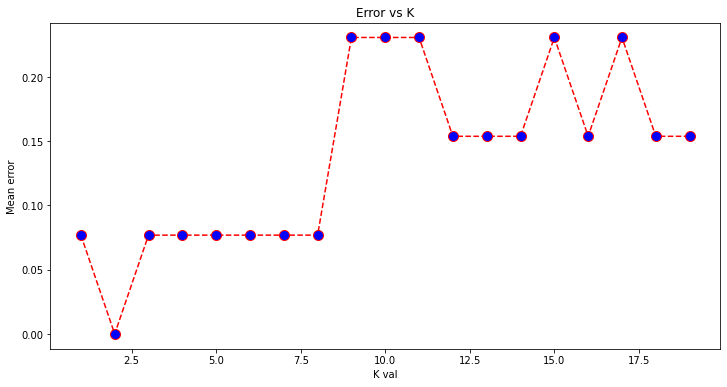

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(range(1,20),error,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title("Error vs K")
plt.xlabel('K val')
plt.ylabel('Mean error')
print(error.index(min(error))+1)
knn=KNeighborsClassifier(algorithm='brute',n_neighbors=error.index(min(error))+1)
knn.fit(X_train,y_train)

In [0]:
y_pred=knn.predict(X_train)

In [14]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_train,y_pred))
print(classification_report(y_train,y_pred))

[[15  0]
 [ 1 21]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.95      0.98        22

    accuracy                           0.97        37
   macro avg       0.97      0.98      0.97        37
weighted avg       0.97      0.97      0.97        37



In [0]:
y_test_pred=knn.predict(X_test)

In [16]:

print(confusion_matrix(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred))

[[10  0]
 [ 0  3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         3

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13

